<a href="https://colab.research.google.com/github/sergeymasl/my_education/blob/main/DS_Stat_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import statsmodels.api as sm


df = pd.read_csv("bikeshare.csv")
del df['datetime']

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

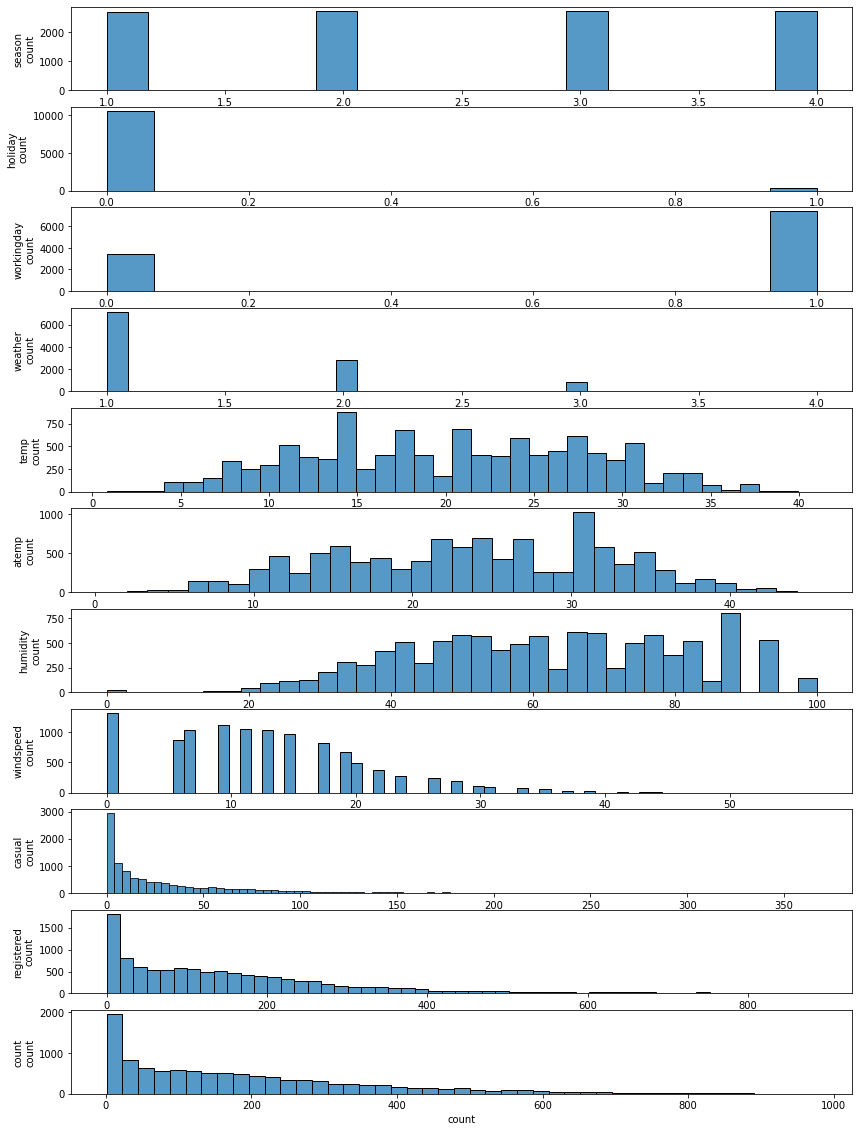

In [ ]:
fig, ax = plt.subplots(nrows=len(df.columns), figsize = (14, 20))

for i, colum in enumerate(df.columns):
  sns.histplot(data = df[colum], ax=ax[i])
  ax[i].set_ylabel(colum + '\ncount')

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [ ]:
def stat(df):
  print("---------------------\nmean = " + str(df.mean()))
  print("---------------------\nvar = " + str(df.var()))
  print("---------------------\nquantile 50 = " + str(df.median()))
  print("---------------------\nquantile 75 = " + str(df.quantile(0.75)))
  print("---------------------\nquantile 99 = " + str(df.quantile(0.99)))
  print("---------------------\nmode = " + str(df.mode()))
  print("\n\n")

In [ ]:
for colum in df.columns:
  print(colum)
  stat(df[colum])

season
---------------------
mean = 2.5066139996325556
---------------------
var = 1.2458450888401458
---------------------
quantile 50 = 3.0
---------------------
quantile 75 = 4.0
---------------------
quantile 99 = 4.0
---------------------
mode = 0    4
dtype: int64



holiday
---------------------
mean = 0.02856880396839978
---------------------
var = 0.02775517702947772
---------------------
quantile 50 = 0.0
---------------------
quantile 75 = 0.0
---------------------
quantile 99 = 1.0
---------------------
mode = 0    0
dtype: int64



workingday
---------------------
mean = 0.6808745177291935
---------------------
var = 0.21730437065606645
---------------------
quantile 50 = 1.0
---------------------
quantile 75 = 1.0
---------------------
quantile 99 = 1.0
---------------------
mode = 0    1
dtype: int64



weather
---------------------
mean = 1.418427337865148
---------------------
var = 0.40175135287314656
---------------------
quantile 50 = 1.0
---------------------
quant

В столбце casual 99 перцентиль находится очень далеко от среднего значения. Возможны отклонения

### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [ ]:
def def_form(df):
  print('Коэффициент ассиметрии -' + skew(df))
  print('Коэффициент ассиметрии -' + kurtosis(df))

In [ ]:
for colum in df.columns:
  print(colum)
  stat(df[colum])

In [ ]:
df.agg(['skew', 'kurtosis'])

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
skew,-0.007076,5.660517,-0.776163,1.243484,0.003691,-0.102560,-0.086335,0.588767,2.495748,1.524805,1.242066
kurtosis,-1.355661,30.046975,-1.397828,0.395533,-0.914530,-0.850076,-0.759818,0.630133,7.551629,2.626081,1.300093


In [4]:
df.shape

(10886, 11)

### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

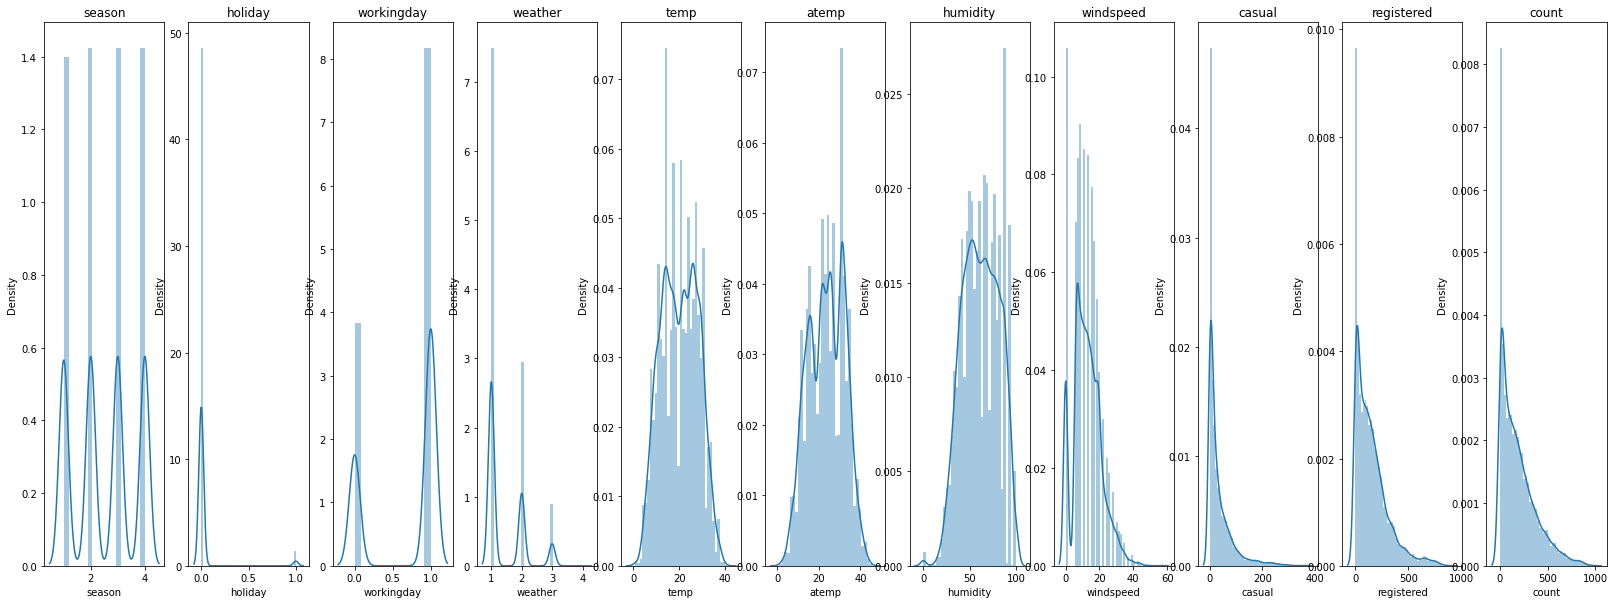

In [11]:
fig, ax = plt.subplots(ncols=df.shape[1], figsize = (28,10))
#проверим распределение похожее на нормальное
for i, colum in enumerate(df.columns):
  sns.distplot(df[colum], ax = ax[i])
  ax[i].set_title(colum)

plt.show()

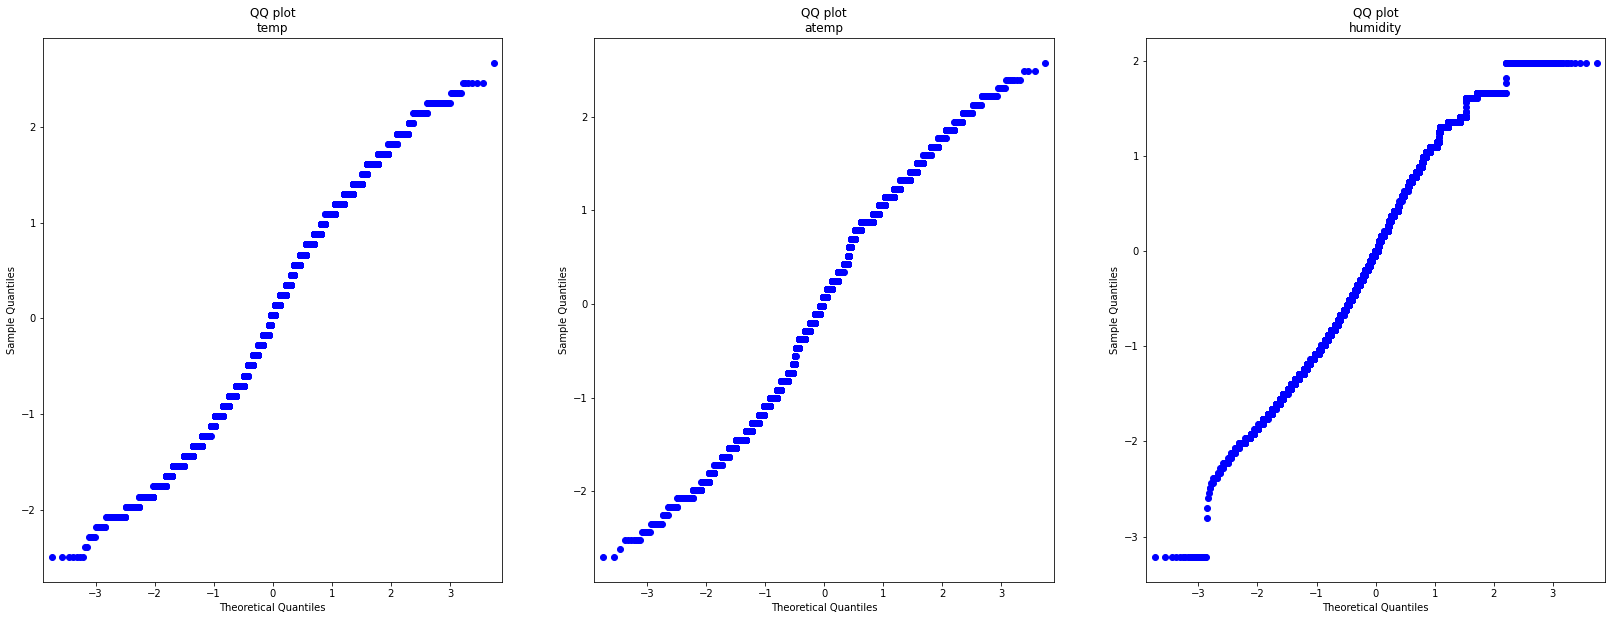

In [19]:
df_norm = df[['temp', 'atemp', 'humidity']]

fig, ax = plt.subplots(ncols=df_norm.shape[1], figsize = (28,10))
for i, colum in enumerate(df_norm.columns):
  sm.qqplot(df_norm[colum], fit = True, ax = ax[i])
  ax[i].set_title('QQ plot\n' + str(colum))

plt.show()

In [20]:
df_norm = df[['temp', 'atemp']]
df_norm.agg('var').idxmax()

'atemp'

In [ ]:
stats.norm.interval(0.95, loc=df['count'].mean(), scale=df['count'].std())

(-163.46247359398893, 546.6107374190854)

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [ ]:
lis = []
for colum in df.columns:
  neg = df[colum].mean() - (3 * df[colum].std())
  pos = df[colum].mean() + (3 * df[colum].std())
  blow = df[(df[colum] < neg) ^ (df[colum] > pos)][colum]
  dir = {}
  dir['colum'] = colum
  dir['count_blow'] = blow.count()
  lis.append(dir)
  
df_blow = pd.DataFrame(lis).set_index('colum')
df_blow.idxmax()

count_blow    holiday
dtype: object

Больше всего выбросов получилось в столбце holiday.
Возможно его нельзя считать метрикой

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

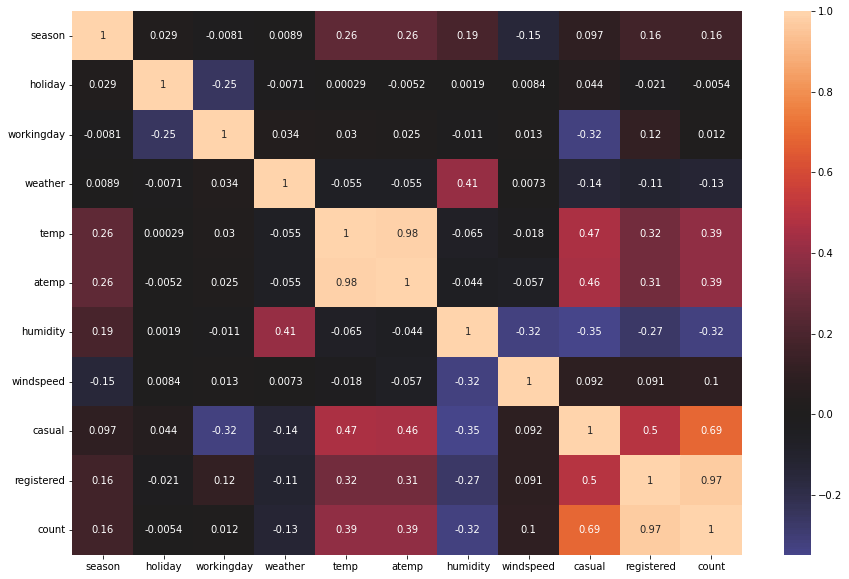

In [ ]:
corr_m = df.corr()
fid, ax = plt.subplots(figsize = (15,10))

sns.heatmap(corr_m, center=0, annot=True, ax = ax)